In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import shutil 
import pandas as pd
import PIL
import cv2
import glob
from tensorflow.keras.preprocessing import image
from PIL import Image

In [5]:
import numpy as np
X_train = np.load('./test_set/X_train.npy')
X_test = np.load('./test_set/X_test.npy')
X_valid = np.load('./test_set/X_valid.npy')

Y_train = np.load('./test_set/Y_train.npy')
Y_test = np.load('./test_set/Y_test.npy')
Y_valid = np.load('./test_set/Y_valid.npy')

In [7]:
X_train.shape, X_valid.shape, X_test.shape

((4480, 200, 200, 3), (1120, 200, 200, 3), (1400, 200, 200, 3))

# 1. Train model

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [6]:
model = keras.Sequential([
                            
                          Conv2D(16,kernel_size=(3,3),padding='same',
                          input_shape=X_train[0].shape,activation=tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),
    
                          Conv2D(32,kernel_size=(3,3),padding='same',activation=tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),
    
                          Conv2D(64,kernel_size=(3,3),padding='same',activation=tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),
    
                          Conv2D(64,kernel_size=(3,3),padding='same',activation=tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),
    
                          Conv2D(64,kernel_size=(3,3),padding='same',activation=tf.nn.relu),
                          MaxPooling2D(pool_size=(2,2)),

                          Flatten(),
                          Dense(512,activation=tf.nn.relu),
                          Dense(1,activation=tf.nn.sigmoid),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        3

In [7]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(
    X_train,Y_train,
    epochs = 10,
    batch_size = 128,
    validation_data = (X_valid,Y_valid),
    shuffle=True,
    callbacks=[early_stopping],
)

Epoch 1/10
35/35 [==============================] - 24s 682ms/step - loss: 5.1687 - accuracy: 0.6154 - val_loss: 0.5209 - val_accuracy: 0.7393
Epoch 2/10
35/35 [==============================] - 23s 662ms/step - loss: 0.3539 - accuracy: 0.8549 - val_loss: 0.3536 - val_accuracy: 0.8384
Epoch 3/10
35/35 [==============================] - 23s 664ms/step - loss: 0.2007 - accuracy: 0.9232 - val_loss: 0.3697 - val_accuracy: 0.8429
Epoch 4/10
35/35 [==============================] - 23s 664ms/step - loss: 0.1599 - accuracy: 0.9391 - val_loss: 0.0901 - val_accuracy: 0.9714
Epoch 5/10
35/35 [==============================] - 23s 671ms/step - loss: 0.0899 - accuracy: 0.9705 - val_loss: 0.0614 - val_accuracy: 0.9795
Epoch 6/10
35/35 [==============================] - 23s 666ms/step - loss: 0.0582 - accuracy: 0.9801 - val_loss: 0.1057 - val_accuracy: 0.9616
Epoch 7/10
35/35 [==============================] - 23s 669ms/step - loss: 0.0576 - accuracy: 0.9797 - val_loss: 0.0525 - val_accuracy: 0.9804

In [8]:
loss, acc = model.evaluate(X_test,Y_test)
print('\nLoss: {}, Acc: {}'.format(loss,acc))

44/44 [==============================] - 2s 35ms/step - loss: 0.0625 - accuracy: 0.9836

Loss: 0.06252992153167725, Acc: 0.9835714101791382


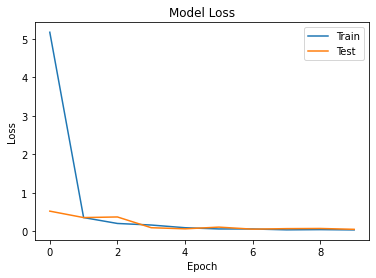

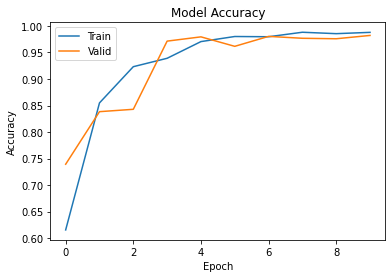

In [9]:
import matplotlib.pyplot as plt
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc=0)

def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Valid'],loc=0)
plt_show_loss(history)
plt.show()
plt_show_acc(history)
plt.show()

In [17]:
from keras.models import load_model
model.save('./test_set/baseline_model_cnn.h5')

In [3]:
from keras.models import load_model
model = load_model('./test_set/baseline_model_cnn.h5')

In [4]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred>0.5, 1 ,0)
print(classification_report(Y_test,Y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9971    0.9898    0.9934       686
         1.0     0.9903    0.9972    0.9937       714

    accuracy                         0.9936      1400
   macro avg     0.9937    0.9935    0.9936      1400
weighted avg     0.9936    0.9936    0.9936      1400



# 2-1. Test Model -> unchanged test set

In [10]:
ctz_original = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/frontal_ctz_original_4.npy')
mgs_original = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/frontal_mgs_original_4.npy')

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
original_img = np.append(ctz_original, mgs_original, axis=0)
y = np.append(np.zeros(shape=ctz_original.shape[0]), np.ones(shape=mgs_original.shape[0]), axis=0)

original_y_pred = model.predict(original_img)
original_y_pred = np.where(original_y_pred>0.5, 1, 0)
print(confusion_matrix(y,original_y_pred))

[[691   9]
 [  9 691]]


In [12]:
print(classification_report(y,original_y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9871    0.9871    0.9871       700
         1.0     0.9871    0.9871    0.9871       700

    accuracy                         0.9871      1400
   macro avg     0.9871    0.9871    0.9871      1400
weighted avg     0.9871    0.9871    0.9871      1400



# 2-2. Test Model -> Skin changed set

In [17]:
ctz_skin_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/ctz_blacked/ctz_skin_changed_4.npy')
mgs_skin_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/mgs_whited/mgs_skin_changed_4.npy')

In [18]:
changed_img = np.append(ctz_skin_changed, mgs_skin_changed, axis=0)
y = np.append(np.zeros(shape=ctz_skin_changed.shape[0]), np.ones(shape=mgs_skin_changed.shape[0]), axis=0)

changed_y_pred = model.predict(changed_img)
changed_y_pred = np.where(changed_y_pred>0.5, 1, 0)

print(confusion_matrix(y,changed_y_pred))

[[681  19]
 [174 526]]


In [19]:
print(classification_report(y,changed_y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.7965    0.9729    0.8759       700
         1.0     0.9651    0.7514    0.8450       700

    accuracy                         0.8621      1400
   macro avg     0.8808    0.8621    0.8604      1400
weighted avg     0.8808    0.8621    0.8604      1400



# 2-3. Test Model -> Nose changed set

In [20]:
ctz_nose_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/ctz_blacked/ctz_nose_changed_4.npy')
mgs_nose_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/mgs_whited/mgs_nose_changed_4.npy')

In [21]:
changed_img = np.append(ctz_nose_changed, mgs_nose_changed, axis=0)
y = np.append(np.zeros(shape=ctz_nose_changed.shape[0]), np.ones(shape=mgs_nose_changed.shape[0]), axis=0)

changed_y_pred = model.predict(changed_img)
changed_y_pred = np.where(changed_y_pred>0.5, 1, 0)

print(confusion_matrix(y,changed_y_pred))

[[692   8]
 [ 12 688]]


In [22]:
print(classification_report(y,changed_y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9830    0.9886    0.9858       700
         1.0     0.9885    0.9829    0.9857       700

    accuracy                         0.9857      1400
   macro avg     0.9857    0.9857    0.9857      1400
weighted avg     0.9857    0.9857    0.9857      1400



# 2-4. Test Model -> Lip changed set

In [23]:
ctz_lip_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/ctz_blacked/ctz_lip_changed_4.npy')
mgs_lip_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/mgs_whited/mgs_lip_changed_4.npy')

In [24]:
changed_img = np.append(ctz_lip_changed, mgs_lip_changed, axis=0)
y = np.append(np.zeros(shape=ctz_lip_changed.shape[0]), np.ones(shape=mgs_lip_changed.shape[0]), axis=0)

changed_y_pred = model.predict(changed_img)
changed_y_pred = np.where(changed_y_pred>0.5, 1, 0)

print(confusion_matrix(y,changed_y_pred))

[[694   6]
 [ 12 688]]


In [25]:
print(classification_report(y,changed_y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9830    0.9914    0.9872       700
         1.0     0.9914    0.9829    0.9871       700

    accuracy                         0.9871      1400
   macro avg     0.9872    0.9871    0.9871      1400
weighted avg     0.9872    0.9871    0.9871      1400



# 2-5. Test Model -> Total changed set

In [26]:
ctz_total_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/ctz_blacked/ctz_total_changed_4.npy')
mgs_total_changed = np.load('/home/dxlab/jupyter/soyoung/racist_model/Detect-Facial-Features/features_changed/mgs_whited/mgs_total_changed_4.npy')

In [27]:
changed_img = np.append(ctz_total_changed, mgs_total_changed, axis=0)
y = np.append(np.zeros(shape=ctz_total_changed.shape[0]), np.ones(shape=mgs_total_changed.shape[0]), axis=0)

changed_y_pred = model.predict(changed_img)
changed_y_pred = np.where(changed_y_pred>0.5, 1, 0)

print(confusion_matrix(y,changed_y_pred))

[[698   2]
 [191 509]]


In [28]:
print(classification_report(y,changed_y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.7852    0.9971    0.8785       700
         1.0     0.9961    0.7271    0.8406       700

    accuracy                         0.8621      1400
   macro avg     0.8906    0.8621    0.8596      1400
weighted avg     0.8906    0.8621    0.8596      1400

